#QUESTION-1



In [96]:
#!pip install selenium


In [97]:
import selenium
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
import requests
import re
import pandas as pd
import time


import warnings
warnings.filterwarnings('ignore')

In [98]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")

In [99]:
url='http://www.amazon.in/'
driver.get(url)

In [100]:
print(" Enter the item that you want to search for: ")
item=input()

 Enter the item that you want to search for: 
Mobile


In [101]:
search_column=driver.find_elements_by_xpath("//input[@class='nav-input nav-progressive-attribute']")
search_column[0].send_keys(item)

In [102]:
search_column[1].click()

#QUESTION-2

In [103]:
def scrape_brand_title():
    brand_title=[]
    try:
        
        
        br=driver.find_elements_by_xpath("//tr[@class='a-spacing-small']")
        for i in br:
            
            if (i.text.find('Brand')!=-1):
                
                brand_title.append(i.text.replace("Brand",""))
        
    except:
        brand_title.append("--")
        
    return brand_title

In [104]:
def scrape_rating():
    #driver.get(url)
    rating=[]
    try:
        
        rating_el=driver.find_element_by_xpath("//td[@class='a-size-base']")
        rating.append(rating_el.text.replace("\n","#"))
        
        
    except:
        print("exception raised")
    return r

In [105]:
def scrape_url():
    #driver.get(url)
    urls=[]
    url=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
    for i in url:
        
        try:
            urls.append(i.get_attribute("href"))
        except:
            urls.append("--")
    return urls

In [106]:
def scrape_n_rating():
   # driver.get(url)
    n_rating=[]
    try:
        n_rating_el=driver.find_elements_by_xpath("//span[@id='acrCustomerReviewText']")
        n_rating.append(n_rating_el[0].text)
    except:
        n_rating.append("--")
    return n_rating

In [107]:
def scrape_price():
    #driver.get(url)
    price=[]
    
    try:
        price_el=driver.find_element_by_xpath("//td[@class='a-span12']/span")
        price.append(price_el.text)
    except:
        price.append("--")
    return price

In [108]:
def scrape_delivery_date():
    #driver.get(url)
    
    del_date=[]
    try:
        delivery=driver.find_element_by_xpath("//div[@class='a-section a-spacing-mini']/b")
        del_date.append(delivery.text)
    except:
        del_date.append("--")
    return del_date

In [109]:
def scrape_details():
    #driver.get(url)
    details=[]
    detail=[]
    try:
        detail_el=driver.find_elements_by_xpath("//ul[@class='a-unordered-list a-vertical a-spacing-mini']/li/span")
        for i in detail_el:
            detail.append(i.text)
        details.append(detail)
    except:
        details.append("--")
    return details

In [110]:
def scrape_availablity():
    #driver.get(url)
    status=[]
    try:
        avail_el=driver.find_element_by_xpath("//div[@id='availability']/span")
        status.append(avail_el.text)
    except:
        status.append("--")
    return status

In [111]:
def scrape_brand_product_title():
    #driver.get(url)
    product_title=[]
    
    try:
        
        br=driver.find_elements_by_xpath("//span[@class='a-size-large product-title-word-break']")
        for i in br:
            
            
            
                product_title.append(i.text)
        
    except:
        product_title.append("--")
    return product_title

In [112]:
import time

In [113]:
url=[]
price=[]
brand=[]
product_brand=[]
rating_and_num=[]
n_rat=[]
other=[]
delivery=[]
availablity=[]
page=1
try:
    while(page<=3):
        
        curr_url=(driver.current_url)
        urls=scrape_url()
        url.extend(urls)
    
        for i in urls:
            driver.get(i)
            time.sleep(3)
            brand.extend(scrape_brand_title())
            product_brand.extend(scrape_brand_product_title())
            rating_and_num.append(scrape_rating())
       
            #n_rat.extend(scrape_n_rating(i))
            other.extend(scrape_details())
            delivery.extend(scrape_delivery_date())
            availablity.extend(scrape_availablity())
            price.extend(scrape_price())
        
        driver.get(curr_url)  
        
        next_btn=driver.find_element_by_xpath("//li[@class='a-last']")
        next_btn.click()
        page=page+1
        time.sleep(3)
    
except:
    
    print("No more elements to be scraped")
len(product_brand)

No more elements to be scraped


0

In [114]:
n_rat=[]
rating=[]
#separating rating and number of ratings data
for i in rating_and_num:
    p=rat_num.find('#')
    first=rat_num[:p]
    second=rat_num[p+1:]
    n_rat.append(first)
    rating.append(second)

In [115]:
brand

[]

In [116]:
import pandas as pd

In [117]:
df=pd.DataFrame()
df['Index']=range(1,len(url)+1)
df['BRAND']=brand
df['MODEL']=product_brand
df['RATING']=rating
df['NUMBER_OF_RATINGS']=n_rat
df['AVAILABLITY']=availablity
df['DELVERY_PERIOD']=delivery
df['DETAILS']=other
df['PRODUCT_URL']=url
df.set_index('Index',inplace=True)
df

,BRAND,MODEL,RATING,NUMBER_OF_RATINGS,AVAILABLITY,DELVERY_PERIOD,DETAILS,PRODUCT_URL
Index,,,,,,,,


#QUESTION-3

In [118]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")

In [119]:
driver.get('https://images.google.com/')

In [120]:
search_field_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_field_designation.send_keys('Fruits')

In [123]:
search_button=driver.find_element_by_class_name("zgAlFc")
search_button.click()

In [124]:
Fruits=[]
Cars=[]
MachineLearning=[]
Guitar=[]
Cakes=[]

In [125]:
Fruits_tags=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
Fruits_tags[0:10]

[<selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="204ab7da-4d95-490f-80f5-bfddb3459320")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="a53dc6d7-4b36-493e-bf27-f14d484edd14")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="20e70812-6501-414b-9864-1b9c04969bfe")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="7d405f1f-64f7-4b71-9252-bf7a625123e3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="63931177-af6a-4b83-9df1-254721a5a0d1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="05c358d0-640b-48fa-8c1c-bb12c554b8d0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="8e47721e-6455-42a9-b140-03

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
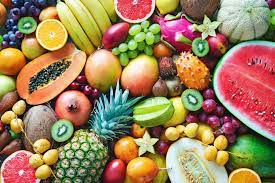
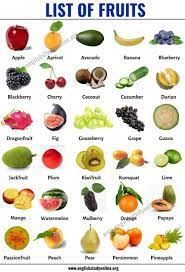
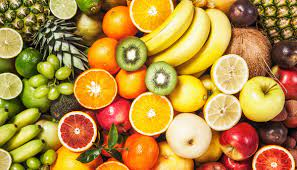
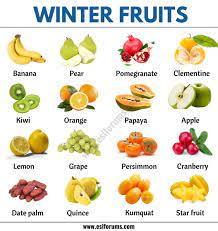
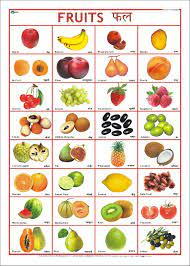
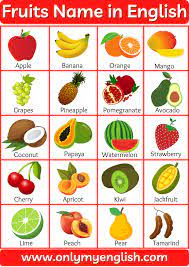
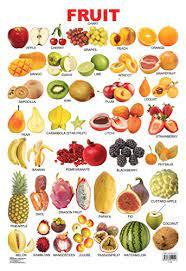
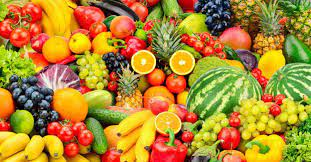
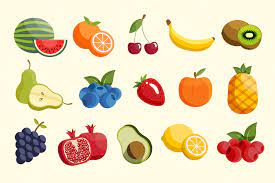
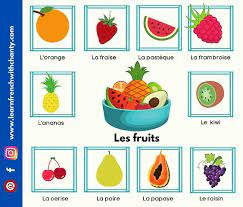

In [126]:
for i in Fruits_tags:
    title=i.get_attribute('src')
    Fruits.append(title)
Fruits=Fruits[0:10]
Fruits

In [127]:
driver.back()

In [128]:
search_field_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_field_designation.send_keys('Cars')

In [129]:
search_button=driver.find_element_by_class_name("zgAlFc")
search_button.click()

In [130]:
Cars_tags=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
Cars_tags[0:10]

[<selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="2b320ceb-5610-48aa-ba84-0efdccd05080")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="253ab22d-f1cf-41dd-914e-d0cb598d4337")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="cf7f9b5a-4fc4-4158-93d9-9e95076bb076")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="faf3bc63-d994-4228-9a2a-17b0576fc348")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="80601025-7e21-477d-906e-d43260ea00b0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="1e997703-0638-492b-b210-13c1ad52fda0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="7c199057-51b4-451e-b670-34

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
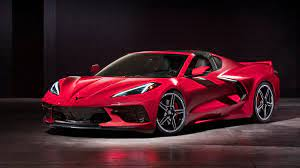
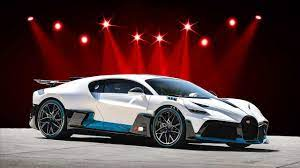
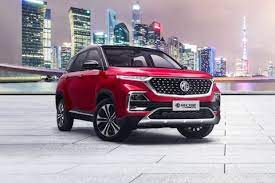
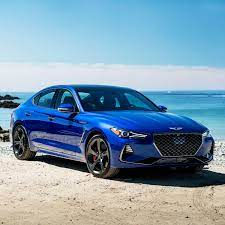
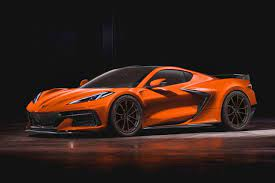
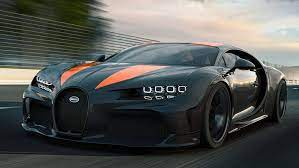
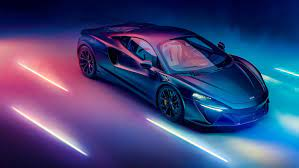
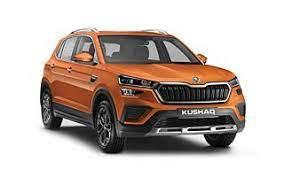
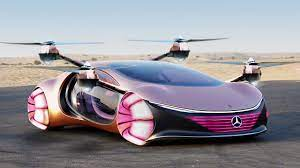
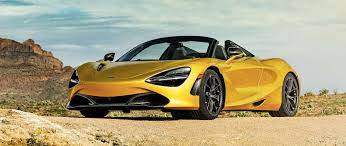
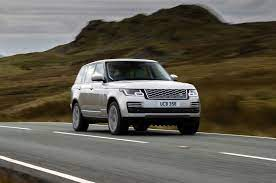
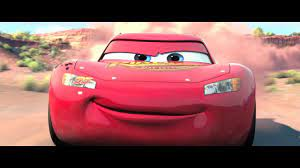
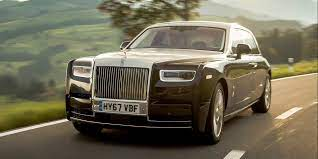
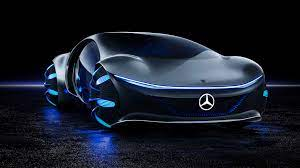
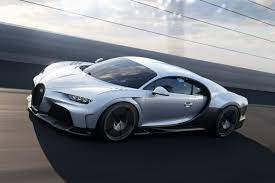
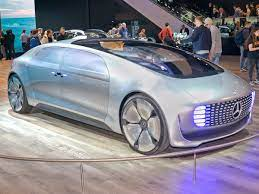
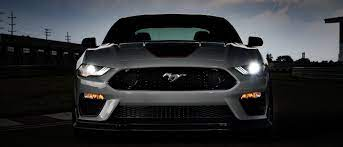
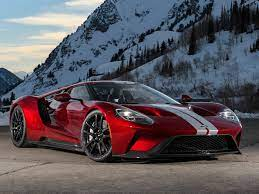
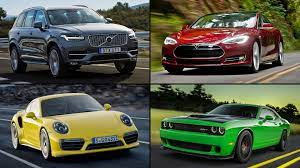
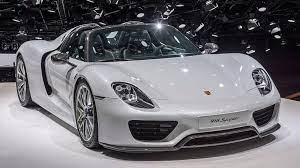

In [131]:
for i in Cars_tags:
    title=i.get_attribute('src')
    Cars.append(title)

Cars

In [132]:
driver.back()

In [133]:
search_field_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_field_designation.send_keys('MachineLearning')

In [134]:
search_button=driver.find_element_by_class_name("zgAlFc")
search_button.click()

In [135]:
MachineLearning_tags=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
MachineLearning_tags[0:10]

[<selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="a9042eee-921e-4508-a03e-e0f54eaae7c2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="ade814fc-3997-447f-9866-1a7ac3bd948b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="c76b6107-c34a-4bab-9cd8-208ed9084c0e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="54b4d4c3-913e-4f4c-bb07-6ae0bffbda4c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="c0e2cc92-7e94-470c-882e-b24c85bc2da9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="31a9a65c-5929-4895-b0e2-2843576d022a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="d77ab3c3-5fb8-4d4f-ad90-01

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
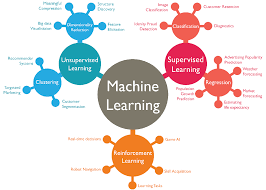
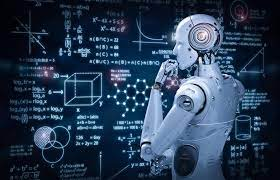
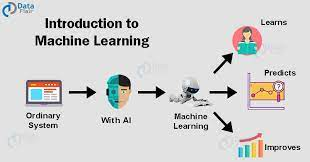
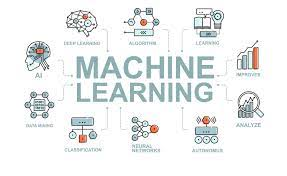
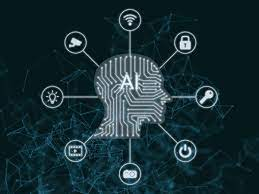
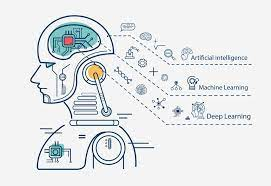
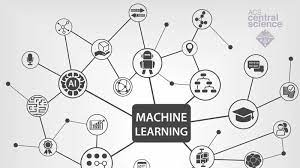
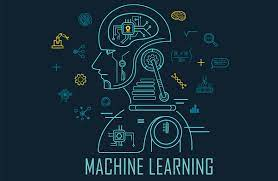
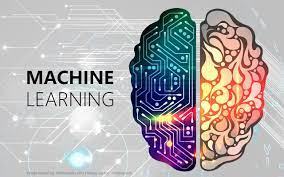
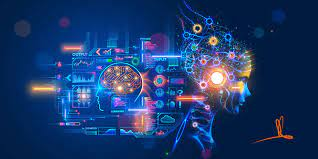
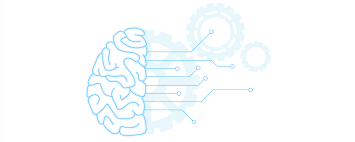
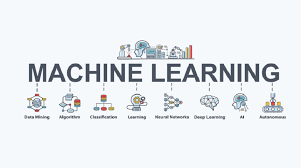
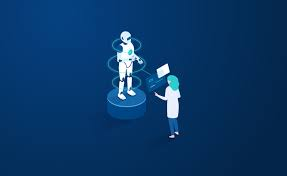
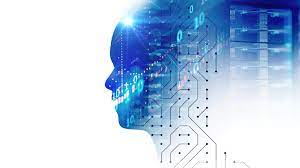
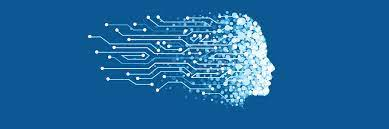
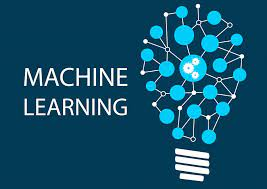
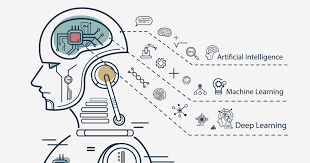
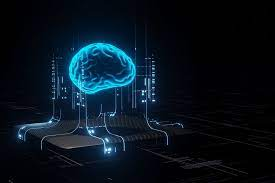
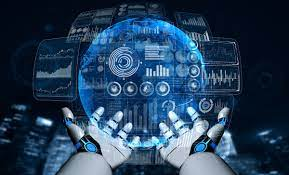
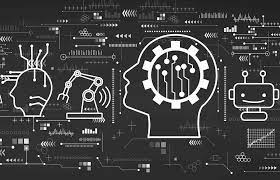

In [136]:
for i in MachineLearning_tags:
    title=i.get_attribute('src')
    MachineLearning.append(title)

MachineLearning

In [137]:
driver.back()

In [138]:
search_field_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_field_designation.send_keys('Guitar')

In [139]:
search_button=driver.find_element_by_class_name("zgAlFc")
search_button.click()

In [140]:
Guitar_tags=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
Guitar_tags[0:10]

[<selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="237c459a-e21e-4ab1-b7e5-bc864a2c80f1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="c5b91b08-1c3d-458a-82e3-9d593b8bf290")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="eb2e4bdf-a3c9-4652-b7d8-5f7e1fe29d21")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="b895862f-698f-4bb4-83d8-89f45947e85e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="4167fd18-a679-47f2-9a33-8cdf3b498fc9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="94fed309-973f-4e42-896e-3050485bde92")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="475dbd35-fe20-4788-96b2-3e

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
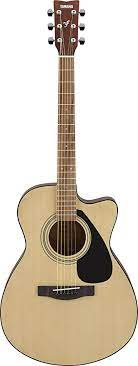
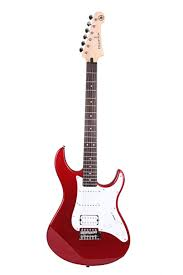
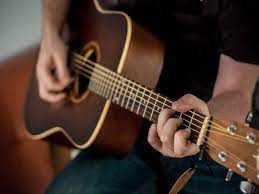
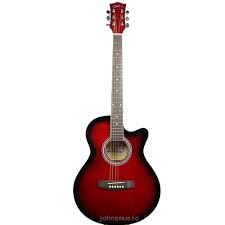
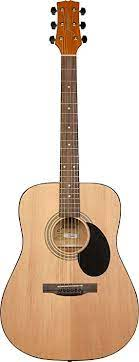
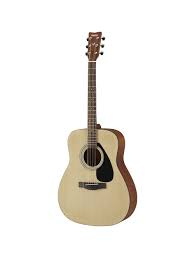
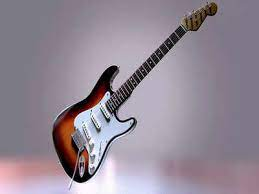
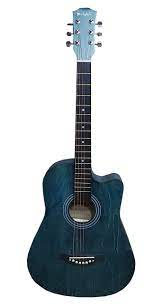
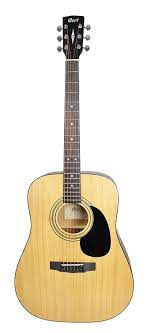
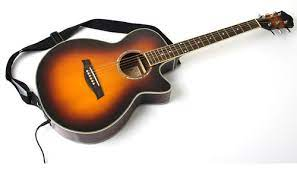
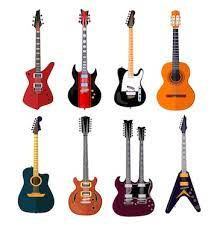
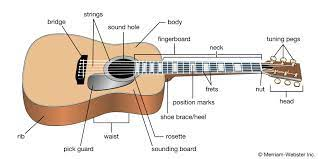
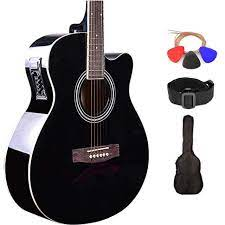
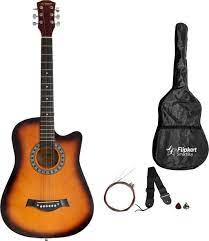
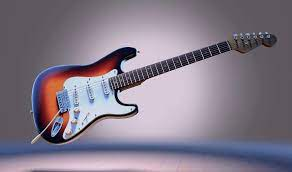
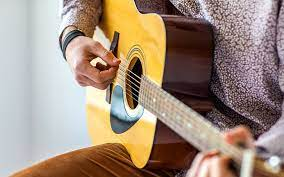
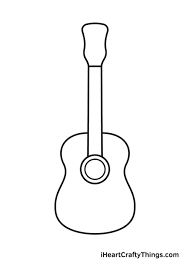
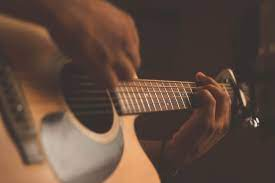
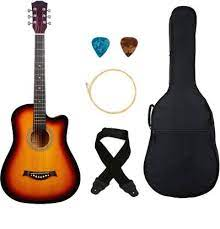
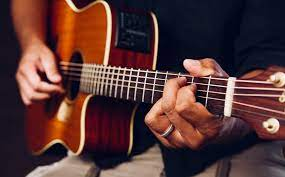

In [141]:
for i in Guitar_tags:
    title=i.get_attribute('src')
    Guitar.append(title)

Guitar

In [142]:
driver.back()

In [143]:
search_field_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_field_designation.send_keys('Cakes')

In [144]:
search_button=driver.find_element_by_class_name("zgAlFc")
search_button.click()

In [145]:
Cakes_tags=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
Cakes_tags[0:10]

[<selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="1f9361d5-e7f4-4308-be9f-326f577ab154")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="08ba8500-e124-467f-9b41-4bc593b0babe")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="bacd8fba-4872-470e-bba0-ba649166b3fc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="237fa98c-7ed6-4297-a349-b9fb5ebb4aa2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="c840bd5a-e2e7-44ef-8599-3bd26ed40be6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="2ce725f9-ea5c-4daa-ab74-fd45fcf5834e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5a63403c943479d0b14cc7b0d4123938", element="502134c7-5c9c-488d-a7d2-f3

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRm84z6HRV5n1dyVOVBp01Sg_YN6cB0Dln_Q&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
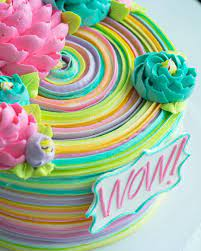
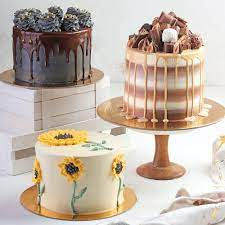
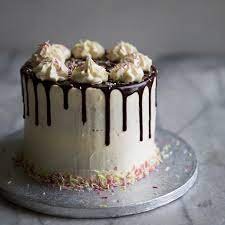
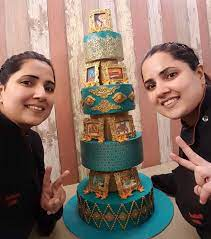
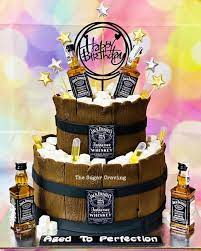
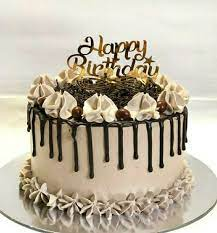
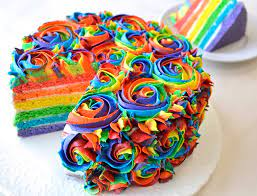
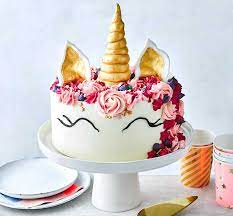
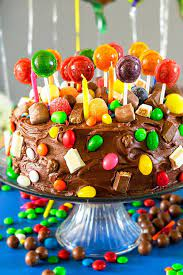
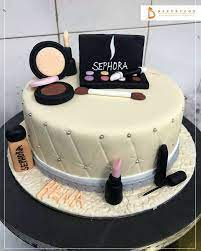
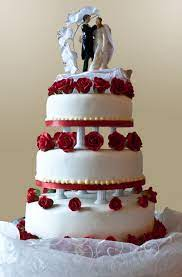
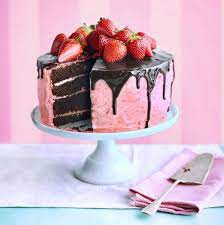
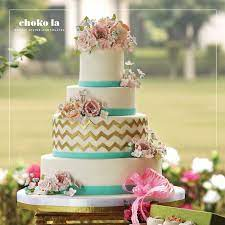
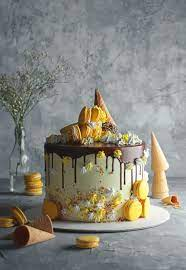
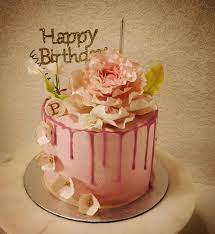
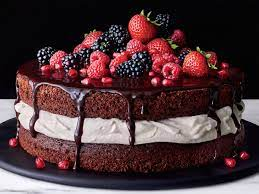
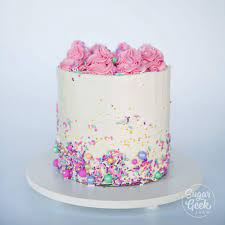
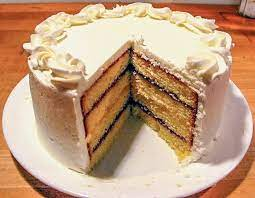
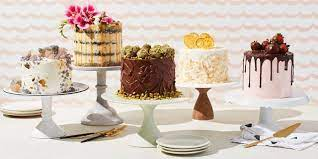
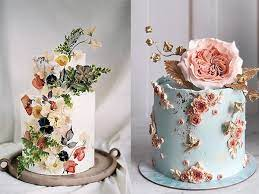

In [146]:
for i in Cakes_tags:
    title=i.get_attribute('src')
    Cakes.append(title)

Cakes

In [147]:
driver.close()


#QUESTION-4

In [148]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")

In [149]:
driver.get('http://www.flipkart.com/')

In [150]:
try:
    login_X_button = driver.find_element_by_xpath('//button[@class="_2KpZ6l _2doB4z"]')                      # Button to close login popup
    login_X_button.click()
except NoSuchElementException : 
    print("No Login page")
search_bar = driver.find_element_by_xpath('//*[@id="container"]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')    # Finding the search bar using it's xpath
search_bar.clear()               # Clearing the search bar
search_bar.send_keys("pixel")       # Inputing keyword to search
search_button = driver.find_element_by_xpath('//button[@class="L0Z3Pu"]')    # Finding the xpath of search button
search_button.click()   

In [151]:
flip_urls = []
urls = driver.find_elements_by_xpath('//a[@class="_1fQZEK"]')
for url in urls:
    flip_urls.append(url.get_attribute("href"))
    
    
    
#Make empty lists   
flip_dict = {}
flip_dict["Brand"] = []
flip_dict["Smartphone"] = []
flip_dict["Colour"] = []
flip_dict["RAM"] = []
flip_dict["Storage(ROM)"] = []
flip_dict["Primary Camera"] = []
flip_dict["Secondary Camera"] = []
flip_dict["Display Size"] = []
flip_dict["Display Resolution"] = []
flip_dict["Processor"] = []
flip_dict["Processor Cores"] = []
flip_dict["Battery Capacity"] = []
flip_dict["Battery Type"] = []
flip_dict["Price"] = []
flip_dict["URL"] = []

In [156]:
for url in flip_urls:
    driver.get(url)    # Saving url                                                     
    print("Scraping URL = ", url)
    flip_dict['URL'].append(url)                                                          # Loading the webpage by url
    time.sleep(2)
    
    try:
        read_more = driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')     # Button for expanding the specs
        read_more.click()
    except NoSuchElementException:
        print("Exception Occured. Moving to next page")
    
    try:
        brand = driver.find_element_by_xpath('//span[@class="B_NuCI"]')      # Extracting Brand from xpath
        flip_dict["Brand"].append(brand.text.split()[0])
    except NoSuchElementException:
        flip_dict['Brand'].append('-')
        
    try:
        price = driver.find_element_by_xpath('//div[@class="_30jeq3 _16Jk6d"]')      # Extracting Price from xpath
        flip_dict['Price'].append(price.text)
    except NoSuchElementException:
        flip_dict['Price'].append('-')
        
    try:
        name = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/table/tbody/tr[3]/td[2]/ul/li')      # Extracting Name from xpath
        flip_dict['Smartphone'].append(name.text)
    except NoSuchElementException:
        flip_dict['Smartphone'].append('-')
    
    try:
        color = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/table/tbody/tr[4]/td[2]/ul/li')      # Extracting colour from xpath
        flip_dict['Colour'].append(color.text)
    except NoSuchElementException:
        flip_dict['Colour'].append('-')
    try:
        disp_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/div')
        if disp_chk.text != "Display Features" : raise NoSuchElementException
        disp_size = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/table[1]/tbody/tr[1]/td[2]/ul/li')  # Extracting Display Size from xpath
        flip_dict['Display Size'].append(disp_size.text)
    except NoSuchElementException:
        flip_dict['Display Size'].append('-')
    
    try:
        disp_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/div')
        if disp_chk.text != "Display Features" : raise NoSuchElementException
        disp_res = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/table[1]/tbody/tr[2]/td[2]/ul/li')     # Extracting Display Resolution from xpath
        flip_dict['Display Resolution'].append(disp_res.text)
    except NoSuchElementException:
        flip_dict['Display Resolution'].append('-')
    
    try:
        pro_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[1]')
        if pro_chk.text != "Processor Type" : raise NoSuchElementException
        processor = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[2]/ul/li')   # Extracting processor from xpath
        flip_dict["Processor"].append(processor.text)
    except NoSuchElementException:
        flip_dict["Processor"].append('-')
    
    try:                                                                                     # Extracting Processor Cores from xpath
        core_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[3]/td[1]')
        if core_chk.text != "Processor Core" :
            core_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[1]')
            if core_chk.text != "Processor Core" : 
                raise NoSuchElementException
            else :
                cores = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[2]/ul/li')
        else :
            cores = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[3]/td[2]/ul/li')
        flip_dict['Processor Cores'].append(cores.text)
    except NoSuchElementException:
        flip_dict['Processor Cores'].append('-')
    try:
        rom = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table[1]/tbody/tr[1]/td[2]/ul/li')         # Extracting Storage(ROM) from xpath
        flip_dict['Storage(ROM)'].append(rom.text)
    except NoSuchElementException:
        flip_dict['Storage(ROM)'].append('-')
    
    try:
        ram = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table[1]/tbody/tr[2]/td[2]/ul/li')                # Extracting RAM from xpath
        flip_dict['RAM'].append(ram.text)
    except NoSuchElementException:
        flip_dict['RAM'].append('-')
    
    try:                                                                                  
        pri_cam = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[2]/td[2]/ul/li')     # Extracting Camera from xpath
        flip_dict['Primary Camera'].append(pri_cam.text)
    except NoSuchElementException:
        flip_dict['Primary Camera'].append('-')
    
    try:                                                                                    # Extracting Secondary Camera from xpath
        cam_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[6]/td[1]')
        if cam_chk != "Secondary Camera" : 
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[5]/td[1]').text == "Secondary Camera":
                sec_cam = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[5]/td[2]/ul/li')
            else :
                raise NoSuchElementException
        else :
            sec_cam = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[6]/td[2]/ul/li')
        flip_dict['Secondary Camera'].append(sec_cam.text)
    except NoSuchElementException:
        flip_dict['Secondary Camera'].append('-')
    try:
        if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/div').text != "Battery & Power Features" :   # Extracting Battery Capacity from xpath
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/div').text == "Battery & Power Features" :
                bat_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/table/tbody/tr/td[1]')
                if bat_chk.text != "Battery Capacity" : raise NoSuchElementException
                bat_cap = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/table/tbody/tr/td[2]/ul/li')                
            elif driver.find_element_by_xpath('//div[@class="_3k-BhJ"][8]/div').text == "Battery & Power Features" :     
                bat_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][8]/table/tbody/tr/td[1]')
                if bat_chk.text != "Battery Capacity" : raise NoSuchElementException
                bat_cap = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][8]/table/tbody/tr/td[2]/ul/li')
            else:
                raise NoSuchElementException
        else :
            bat_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/table/tbody/tr/td[1]')
            if bat_chk.text != "Battery Capacity" : raise NoSuchElementException
            bat_cap = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/table/tbody/tr/td[2]/ul/li')                # Extracting Availability from xpath
        flip_dict['Battery Capacity'].append(bat_cap.text)
    except NoSuchElementException:
        flip_dict['Battery Capacity'].append('-')
    
    try:
        if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/div').text != "Battery & Power Features" :
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/div').text == "Battery & Power Features" :
                bat_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/table/tbody/tr[2]/td[1]')
                if bat_chk.text != "Battery Type" : raise NoSuchElementException
                bat_typ = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/table/tbody/tr[2]/td[2]/ul/li')
            elif driver.find_element_by_xpath('//div[@class="_3k-BhJ"][8]/div').text == "Battery & Power Features" :
                bat_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][8]/table/tbody/tr[2]/td[1]')
                if bat_chk.text != "Battery Type" : raise NoSuchElementException
                bat_typ = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][8]/table/tbody/tr[2]/td[2]/ul/li')
            else:
                raise NoSuchElementException
        else :
            bat_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/table/tbody/tr[2]/td[1]')
            if bat_chk.text != "Battery Type" : raise NoSuchElementException
            bat_typ = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/table/tbody/tr[2]/td[2]/ul/li')             # Extracting Battery Type from xpath
        flip_dict['Battery Type'].append(bat_typ.text)
    except NoSuchElementException:
        flip_dict['Battery Type'].append('-')
    
    

Scraping URL =  https://www.flipkart.com/google-pixel-4a-just-black-128-gb/p/itm023b9677aa45d?pid=MOBFUSBNAZGY7HQU&lid=LSTMOBFUSBNAZGY7HQUWHTF0C&marketplace=FLIPKART&q=pixel&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=b09ca7b4-6ebc-40a6-a791-2dfc2e0b12ab.MOBFUSBNAZGY7HQU.SEARCH&ppt=hp&ppn=homepage&ssid=56oolw8jn40000001656577121589&qH=ab4086ecd47c568d
Scraping URL =  https://www.flipkart.com/google-pixel-3a-clearly-white-64-gb/p/itmfgk4jfgstaack?pid=MOBFFGFPJSCEXMSG&lid=LSTMOBFFGFPJSCEXMSGODGRZE&marketplace=FLIPKART&q=pixel&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=b09ca7b4-6ebc-40a6-a791-2dfc2e0b12ab.MOBFFGFPJSCEXMSG.SEARCH&ppt=hp&ppn=homepage&ssid=56oolw8jn40000001656577121589&qH=ab4086ecd47c568d
Scraping URL =  https://www.flipkart.com/poco-f4-5g-nebula-green-128-gb/p/itmae3dc60dfbc3a?pid=MOBGE853R2HGTSZN&lid=LSTMOBGE853R2HGTSZNYLW7AE&marketplace=FLIPKART&q=pixel&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=sear

In [160]:
driver.close()
    

#QUESTION-5

In [161]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")

In [162]:
driver.get("https://www.google.co.in/maps")
time.sleep(3)


In [163]:
city = input('Enter City Name : ')                                         
search = driver.find_element_by_id("searchboxinput")                       
search.clear()                                                             
time.sleep(2)
search.send_keys(city)                                                     
button = driver.find_element_by_id("searchbox-searchbutton")               
button.click()                                                             
time.sleep(3)

Enter City Name : Banglore


In [164]:
try:
    url_string = driver.current_url
    print("URL Extracted: ", url_string)
    lat_lng = re.findall(r'@(.*)data',url_string)
    if len(lat_lng):
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(lat, lng))

except Exception as e:
        print("Error: ", str(e))

URL Extracted:  https://www.google.co.in/maps/place/Bengaluru,+Karnataka/@12.954517,77.3507271,10z/data=!3m1!4b1!4m5!3m4!1s0x3bae1670c9b44e6d:0xf8dfc3e8517e4fe0!8m2!3d12.9715987!4d77.5945627
Latitude = 12.954517, Longitude = 77.3507271


#QUESTION-6

In [2]:
import selenium
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
import requests
import re
import pandas as pd
import time


import warnings
warnings.filterwarnings('ignore')

In [3]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")

In [4]:
driver.get('https://trak.in/')

In [5]:
button = driver.find_element_by_xpath('//li[@id="menu-item-51510"]/a').get_attribute('href')
driver.get(button)

In [6]:
fund_dict = {}
fund_dict['Date'] = []
fund_dict['Startup Name'] = []
fund_dict['Industry/Vertical'] = []
fund_dict['Sub-Vertical'] = []
fund_dict['Location'] = []
fund_dict['Investor'] = []
fund_dict['Investment Type'] = []
fund_dict['Amount(in USD)'] = []

In [7]:
for i in range(48,51):
    driver.find_element_by_xpath('//div[@id="tablepress-{}_wrapper"]/div/label/select/option[4]'.format(i)).click()

    
    dt = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[2]'.format(i))
    for d in dt:
        fund_dict['Date'].append(d.text)

    
    sn = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[3]'.format(i))
    for n in sn:
        fund_dict['Startup Name'].append(n.text)
    
    
    ind = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[4]'.format(i))
    for n in ind:
        fund_dict['Industry/Vertical'].append(n.text)
    
    
    sv = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[5]'.format(i))
    for s in sv:
        fund_dict['Sub-Vertical'].append(s.text)

    
    loc = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[6]'.format(i))
    for l in loc:
        fund_dict['Location'].append(l.text)
    
    
    inv = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[7]'.format(i))
    for n in inv:
        fund_dict['Investor'].append(n.text)
    
    
    invt = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[8]'.format(i))
    for n in invt:
        fund_dict['Investment Type'].append(n.text)
        
    amt = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[9]'.format(i))
    for a in amt:
        fund_dict['Amount(in USD)'].append(a.text)
    
fund_df = pd.DataFrame(fund_dict)
fund_df

,Date,Startup Name,Industry/Vertical,Sub-Vertical,Location,Investor,Investment Type,Amount(in USD)
0,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


In [8]:
driver.close()

#QUESTION-7

In [9]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")

In [10]:
driver.get('https://www.digit.in/')

In [11]:
top_10=driver.find_element_by_xpath("//div[@class='menu']/ul/li[3]/a")
top_10.click()

In [12]:
laptop=driver.find_element_by_xpath("//*[text()='Best Gaming Laptops in India']")
laptop.click()

In [13]:
name_el=driver.find_elements_by_xpath("//a/h3")

In [14]:
def scrape_text(web_el):
    
    web=[]
    for i in web_el:
        
        web.append(i.text)
    return web

In [15]:
os_el=driver.find_elements_by_xpath("//*[contains(text(),'Windows')]")

In [16]:
name=[]
name.extend(scrape_text(name_el))
len(name)


10

In [17]:
os1=[]
os1.extend(scrape_text(os_el[:14]))
os1

['WINDOWS 11 HOME OS',
 'Windows 11 Home',
 'WINDOWS 11 HOME OS',
 'Windows 11 Home',
 'WINDOWS 10 OS',
 'Windows 10',
 'WINDOWS 10 OS',
 'Windows 10',
 'WINDOWS 10 OS',
 'Windows 10',
 'WINDOWS 10 HOME OS',
 'Windows 10 Home',
 'WINDOWS 10 HOME OS',
 'Windows 10 Home']

In [18]:
os=[]
length=len(os1)
for i in range(0,length,2):
    os.append(os1[i])
len(os)

7

In [19]:
every_el=driver.find_elements_by_xpath("//tr/td")

In [20]:
every_el_=every_el[22:193]

In [21]:
unfiltered=[]
unfiltered.extend(scrape_text(every_el_))
unfiltered

['Amazon',
 '₹ 145,500',
 'ASUS ROG ZEPHYRUS DUO 15',
 'Amazon',
 '₹ 185,000',
 'Acer Aspire 7 gaming laptop',
 'Croma',
 '₹ 53,490',
 'Processor',
 ':',
 '12th Gen Intel Core i9-12900HK processor with 5 GHz clock speed',
 'Display',
 ':',
 '17″ (3840 x 2160) screen, 20Hz refresh rate',
 'OS',
 ':',
 'Windows 11 Home',
 'Memory',
 ':',
 '16 GB DDR5 RAM & 2 TB SSD',
 'Graphics Processor',
 ':',
 'NVIDIA GeForce RTX 3080Ti Graphics card',
 'Body',
 ':',
 '397 x 284 x 26 mm dimension & 2.9 kg weight',
 '',
 'AVAILABLE',
 '₹ 429,940',
 'BUY NOW',
 '',
 '',
 'BUY ON EMI',
 '₹ 71,656/MONTH',
 'GET EMI',
 '*0% Interest\n*0 Down Payment\n*No Processing Fee',
 'Processor',
 ':',
 '12th Gen Intel Core i9-12900H 14 core processor with 2.5 GHz clock speed',
 'Display',
 ':',
 '15.6″ (2560 x 1440) screen, 240Hz refresh rate',
 'OS',
 ':',
 'Windows 11 Home',
 'Memory',
 ':',
 '32 GB DDR5 RAM & 2 TB SSD',
 'Graphics Processor',
 ':',
 '8 GB DDR6 NVIDIA GeForce RTX 3070 Ti Graphics card',
 'Body',
 '

In [22]:
display=[]
processor=[]
memory=[]
weight=[]
dimension=[]
processor=[]
price=[]
g_processor=[]
for i in range(0,len(unfiltered)):
    if(unfiltered[i]=='Display'):
        display.append(unfiltered[i+2])
    if(unfiltered[i]=='Processor'):
        processor.append(unfiltered[i+2])
    if(unfiltered[i]=='Weight'):
        weight.append(unfiltered[i+2])
    if(unfiltered[i]=='Dimension'):
        dimension.append(unfiltered[i+2])
    if(unfiltered[i]=='Memory'):
        memory.append(unfiltered[i+2])
    if(unfiltered[i]=='Price'):
        Price.append(unfiltered[i+2])
    if(unfiltered[i]=='Graphics Processor'):
        g_processor.append(unfiltered[i+2])
len(display)

7

In [23]:
len(g_processor)

7

In [24]:
price=[]
price_el=driver.find_elements_by_xpath("//td[@class='smprice']")
price.extend(scrape_text(price_el))
price

['₹ 429,940',
 '₹ 280,990',
 '₹ 129,990',
 '₹ 134,990',
 '₹ 193,990',
 'N/A',
 '₹ 144,990',
 '₹ 145,500',
 '₹ 185,000',
 '₹ 53,490']

#QUESTION-8


In [25]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")

In [26]:
driver.get('https://www.forbes.com/')

In [27]:
def scrape_text(web_el):
    list=[]
    for i in web_el:
        list.append(i.text)
    return list

In [28]:
billionaries=driver.find_elements_by_xpath("//a[@class='footer__nav-item']")
b_text=scrape_text(billionaries)

In [29]:
for i in range(0,len(b_text)):
    if(b_text[i]=='Billionaires'):
        b_url=(billionaries[i].get_attribute('href'))
b_url

'https://www.forbes.com/worlds-billionaires/'

In [30]:
driver.get(b_url)

In [31]:
b_url2=driver.find_elements_by_xpath("//a[@class='ratio16x9']")
b_url2_=b_url2[0].get_attribute('href')

In [32]:
driver.get(b_url2_)

In [33]:
rank_el=driver.find_elements_by_xpath("//div[@class='rank']")

In [34]:
rank=[]
rank.extend(scrape_text(rank_el))

In [35]:
name=[]
name_el=driver.find_elements_by_xpath("//div[@class='personName']")
name.extend(scrape_text(name_el))

In [36]:
len(name)

200

In [37]:
net_worth=[]
worth=driver.find_elements_by_xpath("//div[@class='netWorth']")
net_worth.extend(scrape_text(worth))
len(net_worth)

200

In [38]:
country=[]
cit=driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
country.extend(scrape_text(cit))
len(country)

200

In [39]:
age=[]
age_el=driver.find_elements_by_xpath("//div[@class='age']")
age.extend(scrape_text(age_el))
age[:10]

['50', '58', '73', '66', '91', '49', '48', '77', '66', '64']

In [40]:
source=[]
source_el=driver.find_elements_by_xpath("//div[@class='source-column']")
source.extend(scrape_text(source_el))
len(source)

200

In [41]:
industry=[]
ind_el=driver.find_elements_by_xpath("//div[@class='category']")
industry.extend(scrape_text(ind_el))
len(industry)

200

In [42]:
import pandas as pd
bill=pd.DataFrame()
bill['RANK']=rank
bill['NAME']=name
bill['NET_WORTH']=net_worth
bill['AGE']=age
bill['CITIZENSHIP']=country
bill['SOURCE']=source
bill['INDUSTRY']=industry
bill.set_index('RANK',inplace=True)
bill

,NAME,NET_WORTH,AGE,CITIZENSHIP,SOURCE,INDUSTRY
RANK,,,,,,
1.,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
2.,Jeff Bezos,$171 B,58,United States,Amazon,Technology
3.,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
4.,Bill Gates,$129 B,66,United States,Microsoft,Technology
5.,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...
192.,Marcel Herrmann Telles,$10.3 B,72,Brazil,beer,Food & Beverage
197.,Leon Black,$10 B,70,United States,private equity,Finance & Investments
197.,Joe Gebbia,$10 B,40,United States,Airbnb,Technology


#QUESTION-10

In [43]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")

In [44]:
driver.get('https://www.hostelworld.com/')

In [53]:
from time import sleep
s_bar=driver.find_element_by_xpath("//input[@class='location-text']")
s_bar.send_keys("London")

sleep(5)

z=driver.find_element_by_xpath("//div[@class='label'][1]")
z.click()

In [54]:
s_button=driver.find_element_by_xpath("//button[@class='button primary large']")
s_button.click()

In [55]:
page=1
name=[]
dist=[]
rating=[]
review=[]
p_price=[]
d_price=[]
fac=[]
desc=[]
url=[]

while page<3:
    
    #scraping distance from city centre
    d=driver.find_elements_by_xpath("//span[@class='description']")
    for i in d:
        dist.append(i.text)
        
    #Scraping privates from price
    try:
        pri=driver.find_elements_by_xpath("//a[@class='prices']/div[1]")[1:]
        for i in pri:
            p_price.append(i.text.replace("Privates From\n",""))
            
    except:
        p_price.append("--")
    
    
    #scraping dorm from price
    try:
        dor=driver.find_elements_by_xpath("//a[@class='prices']/div[2]")
        for i in dor:
            d_price.append(i.text.replace("Dorms From\n",""))
            
    except:
        d_price.append("--")
    
    u=driver.find_elements_by_xpath("//h2[@class='title title-6']/a")
    for i in u:
        url.append(i.get_attribute("href"))
        
    page=page+1 #increment 
    
    #next icon
    try:
        n=driver.find_element_by_xpath("//div[@class='pagination-item pagination-last']")
        n.click()
    except:
        break

In [56]:
for i in url:
    driver.get(i)
    
    #scraping hostel name 
    try:
        n=driver.find_element_by_xpath("//div[@class='title-2']")
        name.append(n.text)
    except:
        name.append("--")
    
    
    #scraping rating
    try:
        r=driver.find_elements_by_xpath("//div[@class='score orange big']")[1]
        rating.append(r.text)
    except:
        rating.append("--")
    
    
    #no.of reviews
    try:
        nr=driver.find_elements_by_xpath("//div[@class='reviews']")[1]
        review.append(nr.text)
    except:
        review.append("--")
        
        
    #scraping facilities 
    try:
        f=driver.find_element_by_xpath("//ul[@class='facility-sections']")
        fac.append(f.text)
    except:
        fac.append("--")
    
    try:
        pd=driver.find_element_by_xpath("//div[@class='content collapse-content']")
        desc.append(pd.text)
    except:
        desc.append("--")
        

In [57]:
import pandas as pd
#data frame 
data=list(zip(name,
dist,
rating,
review,
p_price,
d_price,
fac,
desc,
url,
))
hostel=pd.DataFrame(data=data,columns=["Hostel name","Distance from city centre","Rating","Total Reviews","Private from price","Droms from price","Facilities","Property description","URL"])
hostel

,Hostel name,Distance from city centre,Rating,Total Reviews,Private from price,Droms from price,Facilities,Property description,URL
0,Hostel One Notting Hill,Hostel - 5.5km from city centre,9.1,1386 Total Reviews,No Privates Available,No Dorms Available,Free\nLinen Included Free WiFi Free Internet A...,The perfect place for solo travelers to connec...,https://www.hostelworld.com/pwa/hosteldetails....
1,St Christopher's Hammersmith,Hostel - 7.5km from city centre,8.0,4047 Total Reviews,Rs46389.28 Rs39431,Rs7088.14 Rs6379,Free\nLinen Included Free City Maps Free WiFi ...,"In response to Coronavirus (COVID-19), additio...",https://www.hostelworld.com/pwa/hosteldetails....
2,Selina Camden,Hostel - 5.5km from city centre,8.6,31 Total Reviews,No Privates Available,No Dorms Available,Free\nLinen Included Towels Included Free WiFi...,"Among underground music venues, innovative mus...",https://www.hostelworld.com/pwa/hosteldetails....
3,Saint James Backpackers,Hostel - 5.5km from city centre,6.9,1808 Total Reviews,Rs43646,Rs12694.06 Rs12059,Free\nFree Breakfast Linen Included Free City ...,We are located in central London - just 5 minu...,https://www.hostelworld.com/pwa/hosteldetails....
4,Britannia Inn Hotel,Hotel - 14.5km from city centre,8.1,21 Total Reviews,Rs60490.24 Rs42343,No Dorms Available,Free\nFree Breakfast Free Parking Free Interne...,The Britannia Inn Hotel is situated near the I...,https://www.hostelworld.com/pwa/hosteldetails....
5,London House Hotel,Hotel - 5.3km from city centre,8.6,1381 Total Reviews,Rs49497,No Dorms Available,Free\nFree City Maps Free WiFi\nGeneral\nKey C...,Our lovely boutique hotel is conveniently loca...,https://www.hostelworld.com/pwa/hosteldetails....
6,Cranbrook Hotel,Hotel - 14.8km from city centre,--,--,Rs41088,No Dorms Available,Free\nFree Breakfast Free Parking\nGeneral\nHo...,We are located about twenty minutes by tube fr...,https://www.hostelworld.com/pwa/hosteldetails....
